In [36]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [37]:
import matplotlib.pyplot as plt

# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [38]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [39]:
import seaborn as sns

In [40]:
#checking the shape of the dataset
df.shape

(1000, 8)

In [41]:
#overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [42]:
#checking for null values
df.isna().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [43]:
#checking for duplicate values
df.duplicated().sum()

0

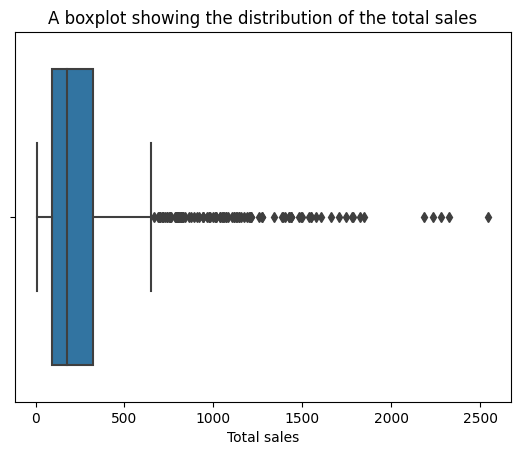

In [44]:
sns.boxplot(df['total'])
plt.title('A boxplot showing the distribution of the total sales')
plt.xlabel('Total sales')
plt.show()

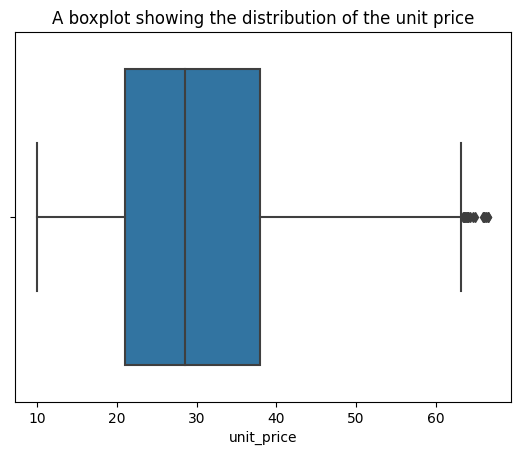

In [45]:
sns.boxplot(df['unit_price'])
plt.title('A boxplot showing the distribution of the unit price')
plt.show()

In [46]:
sales_per_method = df.groupby('payment')['total'].sum().sort_values(ascending=False).reset_index()
sales_per_method

,payment,total
0,Transfer,159642.33
1,Credit card,110271.57
2,Cash,19199.10


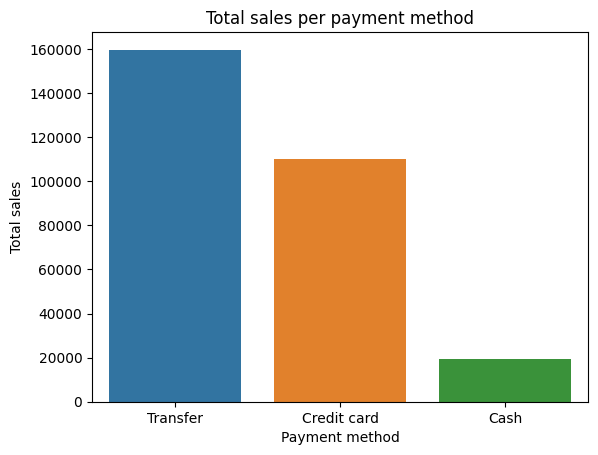

In [47]:
sns.barplot(x='payment', y='total', data=sales_per_method)
plt.title('Total sales per payment method')
plt.xlabel('Payment method')
plt.ylabel('Total sales')
plt.show()

In [48]:
price_per_product = df.groupby('product_line')['unit_price'].mean().sort_values(ascending=False).reset_index()
price_per_product

,product_line,unit_price
0,Engine,60.091803
1,Frame & body,42.832229
2,Suspension & traction,33.969868
3,Electrical system,25.585130
4,Miscellaneous,22.810738
5,Breaking system,17.740522


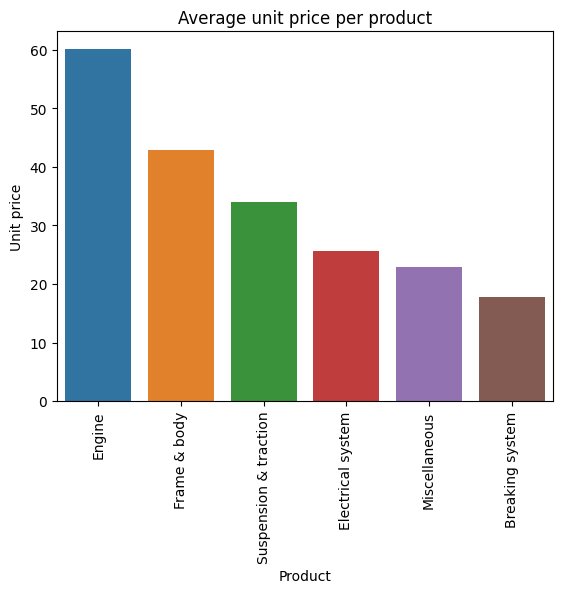

In [49]:
sns.barplot(x='product_line', y='unit_price', data=price_per_product)
plt.title('Average unit price per product')
plt.xlabel('Product')
plt.ylabel('Unit price')
plt.xticks(rotation=90)
plt.show()

In [50]:
purchase_per_client = df.groupby('client_type')['quantity'].mean().sort_values(ascending=False).reset_index()
purchase_per_client

,client_type,quantity
0,Wholesale,23.022222
1,Retail,5.438710


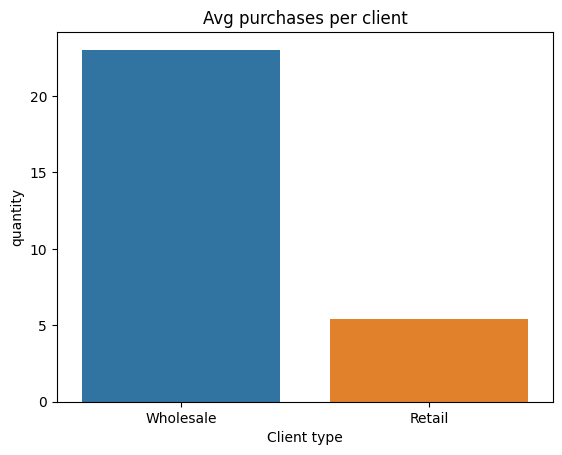

In [51]:
sns.barplot(x='client_type', y='quantity', data=purchase_per_client)
plt.title('Avg purchases per client')
plt.xlabel('Client type')
plt.show()

In [52]:
purchase_per_product = df.groupby('product_line')['quantity'].sum().sort_values(ascending=False).reset_index()
purchase_per_product

,product_line,quantity
0,Suspension & traction,2145
1,Breaking system,2130
2,Electrical system,1698
3,Frame & body,1619
4,Miscellaneous,1176
5,Engine,627


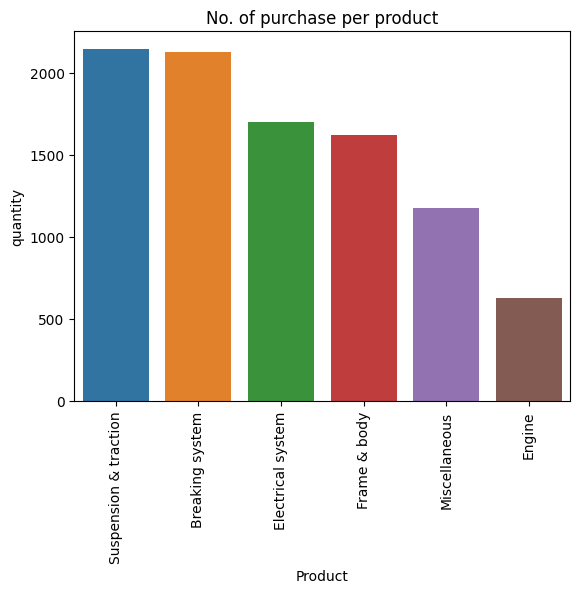

In [53]:
sns.barplot(x='product_line', y='quantity', data=purchase_per_product)
plt.title('No. of purchase per product')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.show()

### Summary
- The dataset was first explored to check for null, duplicate and extreme values.
#### What are the total sales for each payment method?
- The transfer payment method recorded the highest total sales of 160K followed by credit card which has a total sales of 110K. The cash payment method recorded the least total sales of 19K. This depicts that most customers prefer to make payments through transfer or credit card.
#### What is the average unit price for each product line?
- The product line that recorded the highest average unit price is the Engine with an average unit price of 60 while the breaking system recorded the least average unit price with an average unit price of 18. This depicts that the Engine is the most expensive product while the breaking system is the least expensive.
#### Further exploration
- The most purchased product is Suspension and Traction while the least purchased is Engine. Though Engine is the most expensive product, it is the least purchased product.
- Wholesale has more purchases than retail. That's, customers tend to buy wholesale than retail.